In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data_set.csv")
data.head()

,公司,date,code,TEJ子產業_名稱,Q資產報酬率 (C),Q資產報酬率(A)%,Q資產報酬率(B)%,Q淨值報酬率─稅後,Q淨值報酬率─常續性利益,Q營業毛利率,...,Q淨值週轉率 (次),Q應付帳款付現天數,Q淨營業週期 (日),Q每人營收,Q每人營業利益,Q每人配備率,Q當季季底股價淨值比,Q當季季底 PSR,季底普通股市值,return
0,1436 華友聯,2010-09-30,1436,建設,-0.16,1.48,-0.29,1.50,-0.96,41.96,...,0.00,14.16,39553.88,183.0,-244,1061.79,0.88,244.79,2970000.0,-0.003841
1,1438 裕豐,2010-09-30,1438,建設,2.65,2.52,2.52,146.64,146.50,76.40,...,3.15,5.59,1851.44,5900.0,3570,21.83,11.47,2.16,215063.0,0.020080
2,1442 名軒,2010-09-30,1442,建設,0.81,0.74,0.76,1.63,1.63,48.54,...,0.05,129.85,6209.94,2440.0,904,2230.65,1.63,2.09,3957303.0,0.032110
3,1453 大將,2010-09-30,1453,建設,1.95,1.72,1.92,2.78,2.53,11.07,...,0.35,6.51,156.89,1534.0,99,2631.16,0.96,1.18,527610.0,-0.071262
4,1805 寶徠,2010-09-30,1805,建設,-3.72,-4.40,-3.86,-8.75,-8.81,5.56,...,0.22,29.29,160.54,1040.0,-388,2772.03,1.64,1.07,580000.0,0.344828


In [3]:
data.shape

(834, 69)

In [4]:
#產業類別清單
data.TEJ子產業_名稱.unique()

array(['建設', 'IC設計', '連接器', '零組件代理', '汽車組件'], dtype=object)

In [5]:
#混淆矩陣 - 網路找到的
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #, rotation=45
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Random Forest

## IC 設計

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EB95E518>]], dtype=object)

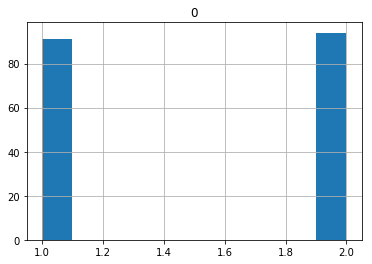

In [6]:
data = pd.read_csv("data_set.csv")

#將財報名稱中的Q剔除

data_columns = np.array([data.columns]).reshape(len(data.columns), )

for i in range(len(data_columns)):
    if (data_columns[i][0] == "Q"):
        data_columns[i] = data_columns[i][1:]
    else:
        data_columns[i] = data_columns[i]

data.columns = data_columns

#選擇產業類別

data = data[data.TEJ子產業_名稱 == 'IC設計']

data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

Return = np.array(data["return"])

for i in range(0, len(Return)):
    if Return[i] < 0.1:
        Return[i] = 1
    else:
        Return[i] =2
##看各群組數量      
pd.DataFrame(Return).hist()

In [7]:
#將return label拿掉
X = data.drop("return", axis = 1)

#將data轉成array
xx = np.zeros([len(data), 1])
for ix in X.columns:
    xx = np.append(xx, np.array(X["{}".format(ix)]).reshape(len(data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

Y = Return

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 666)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini", 
                             n_estimators = 3,  
                             random_state = 20, 
                             max_features = 0.7, 
                             max_depth = 7,      
                             min_samples_leaf = 5) 

clf.fit(x_train, y_train)
z = clf.predict(x_train)

y_predict_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, z)
test_acc = accuracy_score(y_test, y_predict_test)

print("Accuracy_train : %.2f%%" % (train_acc * 100.0),"\n"
      "Accuracy_test  : %.2f%%" % (test_acc * 100.0))

Accuracy_train : 82.17% 
Accuracy_test  : 82.14%


In [9]:
# from sklearn.model_selection import cross_val_score

# clf = RandomForestClassifier(criterion = "gini", 
#                              n_estimators = 3,  
#                              random_state = 20, 
#                              max_features = 0.7, 
#                              max_depth = 7,      
#                              min_samples_leaf = 5)

# scores = cross_val_score(clf, X, Y, cv = 10)
# scores

In [10]:
# scores.mean(), scores.std()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EB95E940>]], dtype=object)

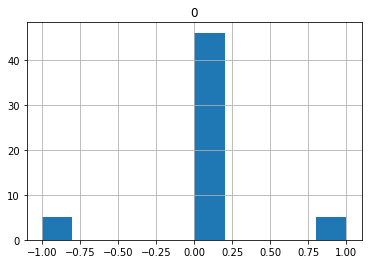

In [11]:
pd.DataFrame((y_predict_test - y_test)).hist()

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict_test)

array([[18,  5],
       [ 5, 28]], dtype=int64)

Normalized confusion matrix
[[ 0.7826087   0.2173913 ]
 [ 0.15151515  0.84848485]]


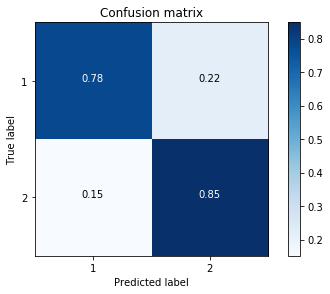

In [13]:
plot_confusion_matrix(confusion_matrix(y_test, y_predict_test), classes = ["1", "2"], normalize = True)

In [14]:
importance = pd.DataFrame(list(zip(data.drop("return", axis = 1).columns, clf.feature_importances_)))
importance.sort_values(by = 1, ascending = False, inplace = True)
importance[importance[1] > 0]

,0,1
59,每人營業利益,0.115730
57,淨營業週期 (日),0.109424
39,稅後淨利變動率(單季),0.091094
61,當季季底股價淨值比,0.076388
34,總資產成長率,0.068717
2,資產報酬率(B)%,0.060817
16,稅率 (A)%,0.059657
55,淨值週轉率 (次),0.059009
29,營業利益成長率,0.049233
21,每股現金流量,0.039745


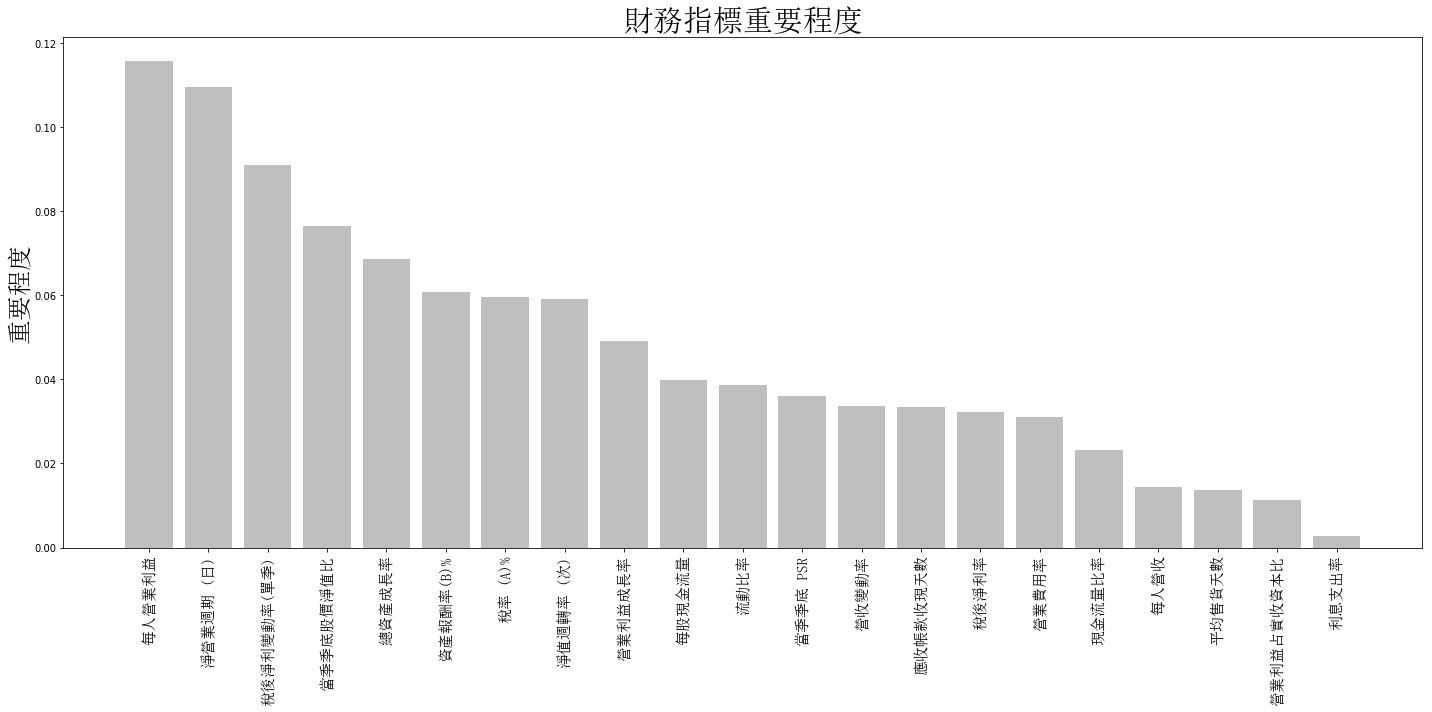

In [15]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=15)

objects = importance[0][importance[1] > 0].values
y_pos = np.arange(len(objects))
performance = importance[1][importance[1] > 0]

plt.figure(figsize = (20, 10))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "grey")
plt.xticks(y_pos, objects, rotation = 90, fontproperties=font)
plt.ylabel(u'重要程度', fontproperties=font, size = 25)
plt.title('財務指標重要程度', fontproperties=font, size = 30)
plt.tight_layout()
plt.show()

In [16]:
predict_data = pd.read_csv("predict_data-set.csv")
predict_data = predict_data[predict_data["TEJ子產業_名稱"] == "IC設計"]

company_list = np.array([predict_data["公司"]]).reshape(len(predict_data["公司"]), )
company_code = np.array([predict_data["code"]]).reshape(len(predict_data["code"]), )
company_type = np.array([predict_data["TEJ子產業_名稱"]]).reshape(len(predict_data["code"]), )

predict_data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

#將data轉成array
xx = np.zeros([len(predict_data), 1])
for ix in predict_data.columns:
    xx = np.append(xx, np.array(predict_data["{}".format(ix)]).reshape(len(predict_data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

recommand_list_ic_desgin = pd.DataFrame(list(zip(company_list, company_code, company_type, clf.predict(X))))
recommand_list_ic_desgin = recommand_list_ic_desgin[recommand_list_ic_desgin[3] == 2]
recommand_list_ic_desgin

,0,1,2,3
1,2379 瑞昱,2379,IC設計,2.0
3,2401 凌陽,2401,IC設計,2.0
4,2436 偉詮電,2436,IC設計,2.0
7,3006 晶豪科,3006,IC設計,2.0
9,3035 智原,3035,IC設計,2.0
11,3257 虹冠電,3257,IC設計,2.0
13,3545 敦泰,3545,IC設計,2.0
14,3588 通嘉,3588,IC設計,2.0
16,4919 新唐,4919,IC設計,2.0
17,4952 凌通,4952,IC設計,2.0


## 建設

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EDD562E8>]], dtype=object)

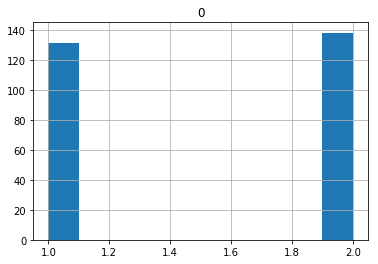

In [17]:
data = pd.read_csv("data_set.csv")

#將財報名稱中的Q剔除

data_columns = np.array([data.columns]).reshape(len(data.columns), )

for i in range(len(data_columns)):
    if (data_columns[i][0] == "Q"):
        data_columns[i] = data_columns[i][1:]
    else:
        data_columns[i] = data_columns[i]

data.columns = data_columns

#選擇產業類別

data = data[data.TEJ子產業_名稱 == '建設']

data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

Return = np.array(data["return"])

for i in range(0, len(Return)):
    if Return[i] < 0.05:
        Return[i] = 1
    else:
        Return[i] =2
##看各群組數量      
pd.DataFrame(Return).hist()

In [18]:
#將return label拿掉
X = data.drop("return", axis = 1)

#將data轉成array
xx = np.zeros([len(data), 1])
for ix in X.columns:
    xx = np.append(xx, np.array(X["{}".format(ix)]).reshape(len(data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

Y = Return

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 666)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini", 
                             n_estimators = 3,  
                             random_state = 78, 
                             max_features = 0.2, 
                             max_depth = 7,      
                             min_samples_leaf = 5) 

clf.fit(x_train, y_train)
z = clf.predict(x_train)

y_predict_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, z)
test_acc = accuracy_score(y_test, y_predict_test)

print("Accuracy_train : %.2f%%" % (train_acc * 100.0),"\n"
      "Accuracy_test  : %.2f%%" % (test_acc * 100.0))

Accuracy_train : 76.06% 
Accuracy_test  : 64.20%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EDD25320>]], dtype=object)

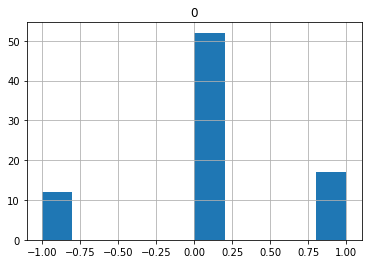

In [20]:
pd.DataFrame((y_predict_test - y_test)).hist()

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict_test)

array([[27, 17],
       [12, 25]], dtype=int64)

Normalized confusion matrix
[[ 0.61363636  0.38636364]
 [ 0.32432432  0.67567568]]


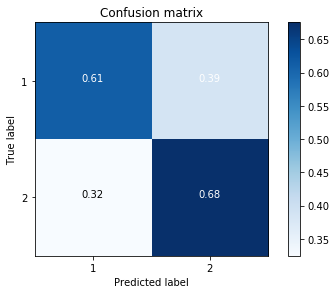

In [22]:
plot_confusion_matrix(confusion_matrix(y_test, y_predict_test), classes = ["1", "2"], normalize = True)

In [23]:
importance = pd.DataFrame(list(zip(data.drop("return", axis = 1).columns, clf.feature_importances_)))
importance.sort_values(by = 1, ascending = False, inplace = True)
importance[importance[1] > 0]

,0,1
7,營業利益率,0.162601
50,應收帳款週轉率(次),0.105402
30,稅前淨利成長率,0.074916
31,稅後淨利成長率,0.059987
38,營業利益變動率,0.059068
33,常續性利益成長率(稅後),0.055671
19,每股淨值 (C),0.045256
60,每人配備率,0.044023
46,借款依存度,0.042392
17,每股淨值 (B),0.039099


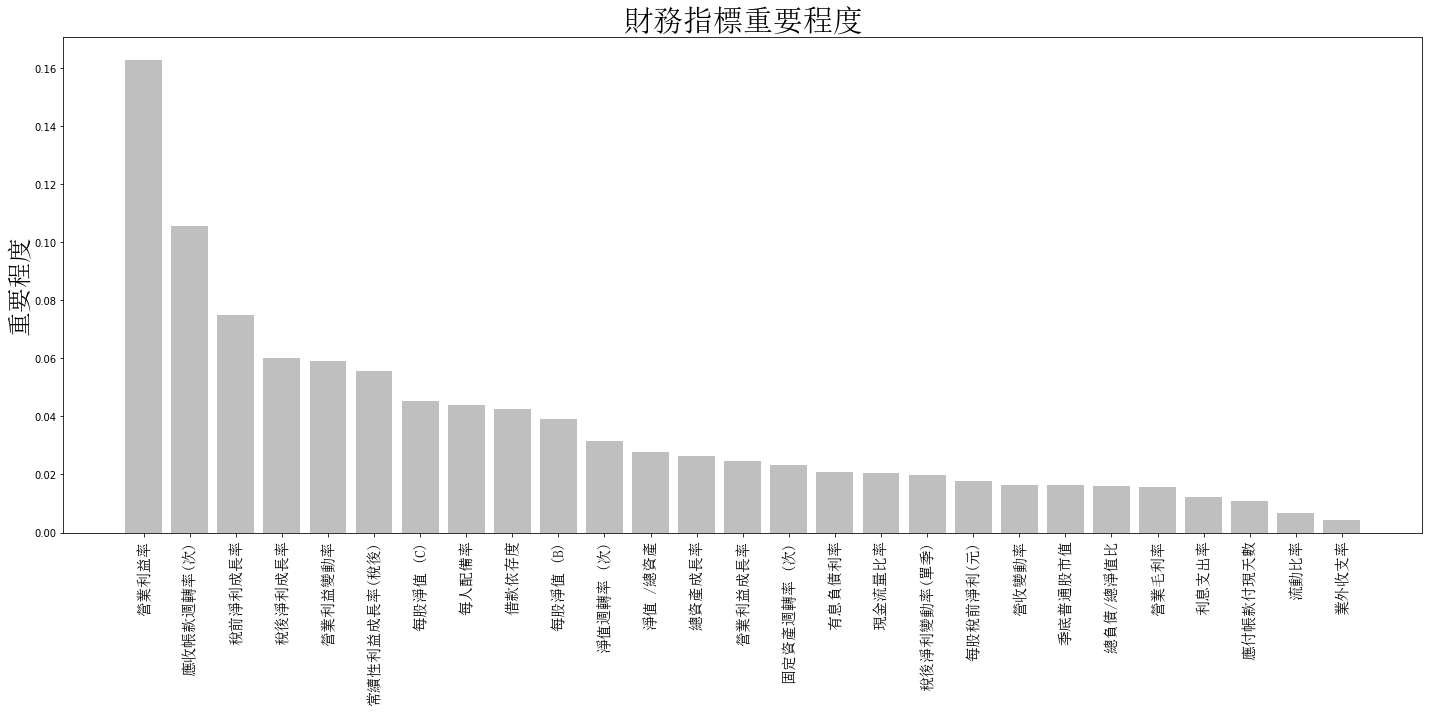

In [24]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=15)

objects = importance[0][importance[1] > 0].values
y_pos = np.arange(len(objects))
performance = importance[1][importance[1] > 0]

plt.figure(figsize = (20, 10))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "grey")
plt.xticks(y_pos, objects, rotation = 90, fontproperties=font)
plt.ylabel(u'重要程度', fontproperties=font, size = 25)
plt.title('財務指標重要程度', fontproperties=font, size = 30)
plt.tight_layout()
plt.show()

In [25]:
predict_data = pd.read_csv("predict_data-set.csv")
predict_data = predict_data[predict_data["TEJ子產業_名稱"] == "建設"]

company_list = np.array([predict_data["公司"]]).reshape(len(predict_data["公司"]), )
company_code = np.array([predict_data["code"]]).reshape(len(predict_data["code"]), )
company_type = np.array([predict_data["TEJ子產業_名稱"]]).reshape(len(predict_data["code"]), )

predict_data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

#將data轉成array
xx = np.zeros([len(predict_data), 1])
for ix in predict_data.columns:
    xx = np.append(xx, np.array(predict_data["{}".format(ix)]).reshape(len(predict_data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

recommand_list_construct = pd.DataFrame(list(zip(company_list, company_code, company_type, clf.predict(X))))
recommand_list_construct = recommand_list_construct[recommand_list_construct[3] == 2]
recommand_list_construct

,0,1,2,3
0,1436 華友聯,1436,建設,2.0
1,1442 名軒,1442,建設,2.0
3,1808 潤隆,1808,建設,2.0
4,2442 新美齊,2442,建設,2.0
5,2501 國建,2501,建設,2.0
6,2505 國揚,2505,建設,2.0
7,2511 太子,2511,建設,2.0
8,2520 冠德,2520,建設,2.0
13,2534 宏盛,2534,建設,2.0
17,2539 櫻花建,2539,建設,2.0


## 汽車組件

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EE0B9C88>]], dtype=object)

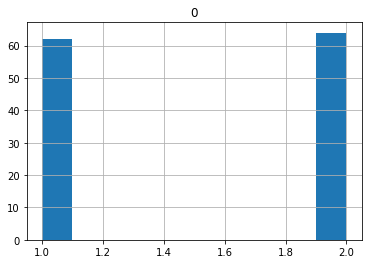

In [26]:
data = pd.read_csv("data_set.csv")

#將財報名稱中的Q剔除

data_columns = np.array([data.columns]).reshape(len(data.columns), )

for i in range(len(data_columns)):
    if (data_columns[i][0] == "Q"):
        data_columns[i] = data_columns[i][1:]
    else:
        data_columns[i] = data_columns[i]

data.columns = data_columns

#選擇產業類別

data = data[data.TEJ子產業_名稱 == '汽車組件']

data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

Return = np.array(data["return"])

for i in range(0, len(Return)):
    if Return[i] < 0.11:
        Return[i] = 1
    else:
        Return[i] =2
##看各群組數量      
pd.DataFrame(Return).hist()

In [27]:
#將return label拿掉
X = data.drop("return", axis = 1)

#將data轉成array
xx = np.zeros([len(data), 1])
for ix in X.columns:
    xx = np.append(xx, np.array(X["{}".format(ix)]).reshape(len(data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

Y = Return

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 666)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini", 
                             n_estimators = 3,  
                             random_state = 963, 
                             max_features = 0.2, 
                             max_depth = 7,      
                             min_samples_leaf = 5) 

clf.fit(x_train, y_train)
z = clf.predict(x_train)

y_predict_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, z)
test_acc = accuracy_score(y_test, y_predict_test)

print("Accuracy_train : %.2f%%" % (train_acc * 100.0),"\n"
      "Accuracy_test  : %.2f%%" % (test_acc * 100.0))

Accuracy_train : 80.68% 
Accuracy_test  : 76.32%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EE0ABF60>]], dtype=object)

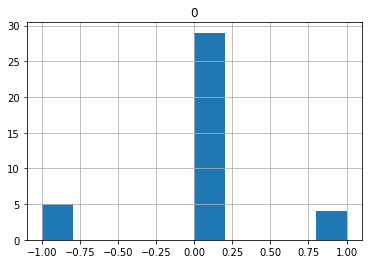

In [29]:
pd.DataFrame((y_predict_test - y_test)).hist()

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict_test)

array([[18,  4],
       [ 5, 11]], dtype=int64)

Normalized confusion matrix
[[ 0.81818182  0.18181818]
 [ 0.3125      0.6875    ]]


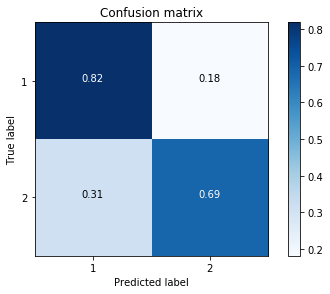

In [31]:
plot_confusion_matrix(confusion_matrix(y_test, y_predict_test), classes = ["1", "2"], normalize = True)

In [32]:
importance = pd.DataFrame(list(zip(data.drop("return", axis = 1).columns, clf.feature_importances_)))
importance.sort_values(by = 1, ascending = False, inplace = True)
importance[importance[1] > 0]

,0,1
52,存貨週轉率 (次),0.091685
48,稅前純益 /實收資本,0.088936
7,營業利益率,0.086101
58,每人營收,0.071628
25,每股淨值(F),0.071499
19,每股淨值 (C),0.070459
37,營收變動率,0.064857
40,流動比率,0.060257
31,稅後淨利成長率,0.059219
50,應收帳款週轉率(次),0.058228


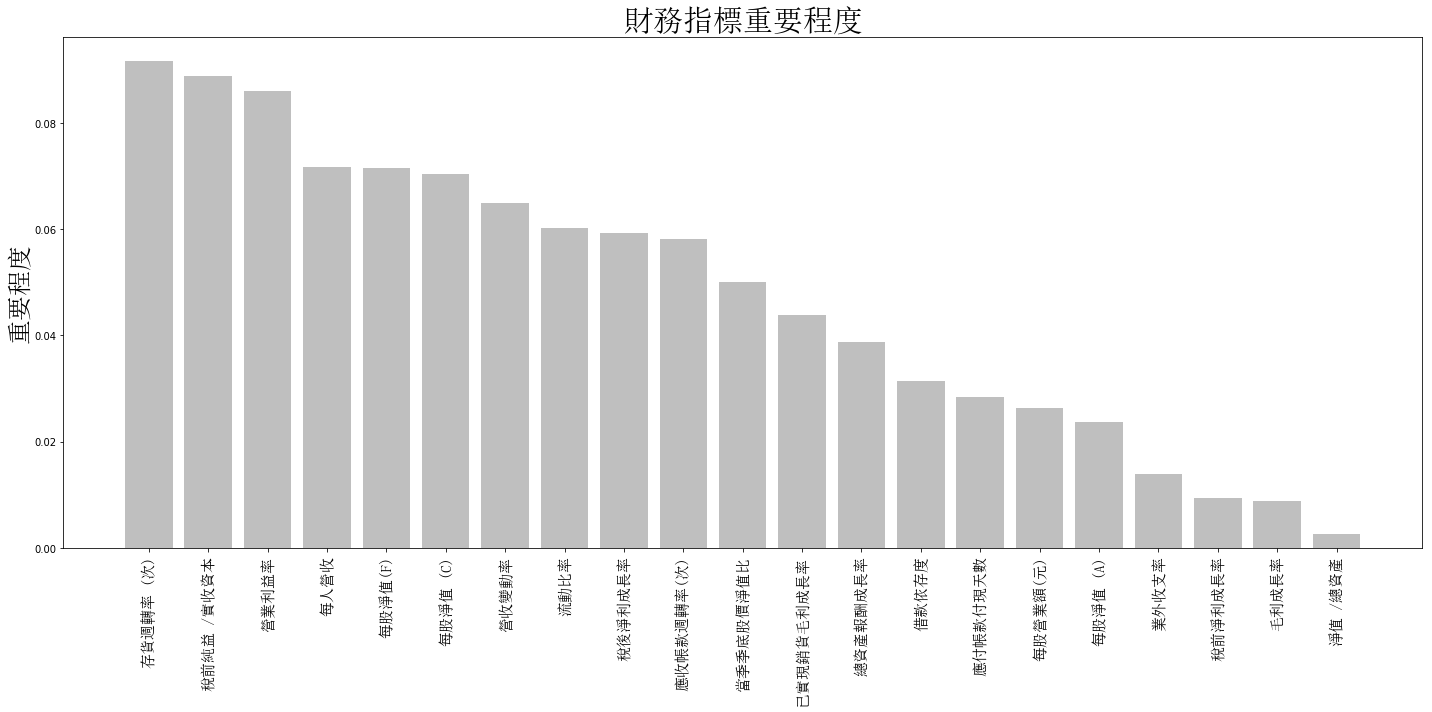

In [33]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=15)

objects = importance[0][importance[1] > 0].values
y_pos = np.arange(len(objects))
performance = importance[1][importance[1] > 0]

plt.figure(figsize = (20, 10))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "grey")
plt.xticks(y_pos, objects, rotation = 90, fontproperties=font)
plt.ylabel(u'重要程度', fontproperties=font, size = 25)
plt.title('財務指標重要程度', fontproperties=font, size = 30)
plt.tight_layout()
plt.show()

In [34]:
predict_data = pd.read_csv("predict_data-set.csv")
predict_data = predict_data[predict_data["TEJ子產業_名稱"] == "汽車組件"]

company_list = np.array([predict_data["公司"]]).reshape(len(predict_data["公司"]), )
company_code = np.array([predict_data["code"]]).reshape(len(predict_data["code"]), )
company_type = np.array([predict_data["TEJ子產業_名稱"]]).reshape(len(predict_data["code"]), )

predict_data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

#將data轉成array
xx = np.zeros([len(predict_data), 1])
for ix in predict_data.columns:
    xx = np.append(xx, np.array(predict_data["{}".format(ix)]).reshape(len(predict_data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

recommand_list_car = pd.DataFrame(list(zip(company_list, company_code, company_type, clf.predict(X))))
recommand_list_car = recommand_list_car[recommand_list_car[3] == 2]
recommand_list_car

,0,1,2,3
0,1319 東陽,1319,汽車組件,2.0
2,1339 昭輝,1339,汽車組件,2.0
3,1506 正道,1506,汽車組件,2.0
4,1512 瑞利,1512,汽車組件,2.0
6,1524 耿鼎,1524,汽車組件,2.0
7,1525 江申,1525,汽車組件,2.0
8,1533 車王電,1533,汽車組件,2.0
10,1568 倉佑,1568,汽車組件,2.0
12,2115 六暉-KY,2115,汽車組件,2.0
13,2228 劍麟,2228,汽車組件,2.0


## 連接器

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EE223390>]], dtype=object)

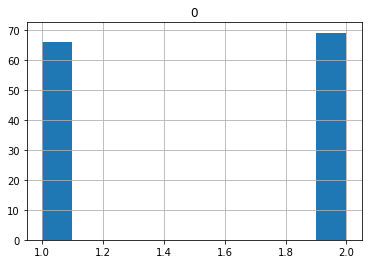

In [35]:
data = pd.read_csv("data_set.csv")

#將財報名稱中的Q剔除

data_columns = np.array([data.columns]).reshape(len(data.columns), )

for i in range(len(data_columns)):
    if (data_columns[i][0] == "Q"):
        data_columns[i] = data_columns[i][1:]
    else:
        data_columns[i] = data_columns[i]

data.columns = data_columns

#選擇產業類別

data = data[data.TEJ子產業_名稱 == '連接器']

data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

Return = np.array(data["return"])

for i in range(0, len(Return)):
    if Return[i] < 0.09:
        Return[i] = 1
    else:
        Return[i] =2
##看各群組數量      
pd.DataFrame(Return).hist()

In [36]:
#將return label拿掉
X = data.drop("return", axis = 1)

#將data轉成array
xx = np.zeros([len(data), 1])
for ix in X.columns:
    xx = np.append(xx, np.array(X["{}".format(ix)]).reshape(len(data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

Y = Return

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 66)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini", 
                             n_estimators = 5,  
                             random_state = 31, 
                             max_features = 0.6, #0.2 ,0.6
                             max_depth = 7,      
                             min_samples_leaf = 12) 

clf.fit(x_train, y_train)
z = clf.predict(x_train)

y_predict_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, z)
test_acc = accuracy_score(y_test, y_predict_test)

print("Accuracy_train : %.2f%%" % (train_acc * 100.0),"\n"
      "Accuracy_test  : %.2f%%" % (test_acc * 100.0))

Accuracy_train : 73.40% 
Accuracy_test  : 70.73%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EE16E470>]], dtype=object)

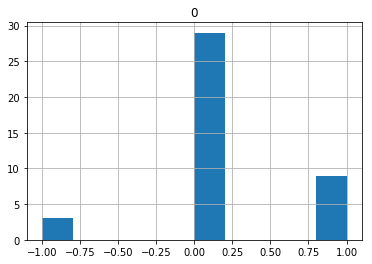

In [38]:
pd.DataFrame((y_predict_test - y_test)).hist()

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict_test)

array([[12,  9],
       [ 3, 17]], dtype=int64)

Normalized confusion matrix
[[ 0.57142857  0.42857143]
 [ 0.15        0.85      ]]


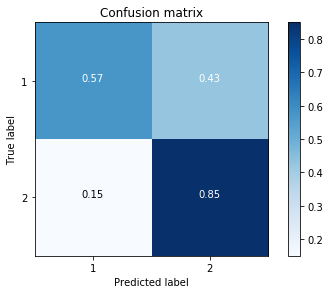

In [40]:
plot_confusion_matrix(confusion_matrix(y_test, y_predict_test), classes = ["1", "2"], normalize = True)

In [41]:
importance = pd.DataFrame(list(zip(data.drop("return", axis = 1).columns, clf.feature_importances_)))
importance.sort_values(by = 1, ascending = False, inplace = True)
importance[importance[1] > 0]

,0,1
56,應付帳款付現天數,0.117281
34,總資產成長率,0.115109
58,每人營收,0.102203
7,營業利益率,0.099013
6,已實現銷貨毛利率,0.098538
11,常續利益率(稅後),0.086566
38,營業利益變動率,0.084614
59,每人營業利益,0.072747
19,每股淨值 (C),0.053323
22,每股營業額(元),0.051194


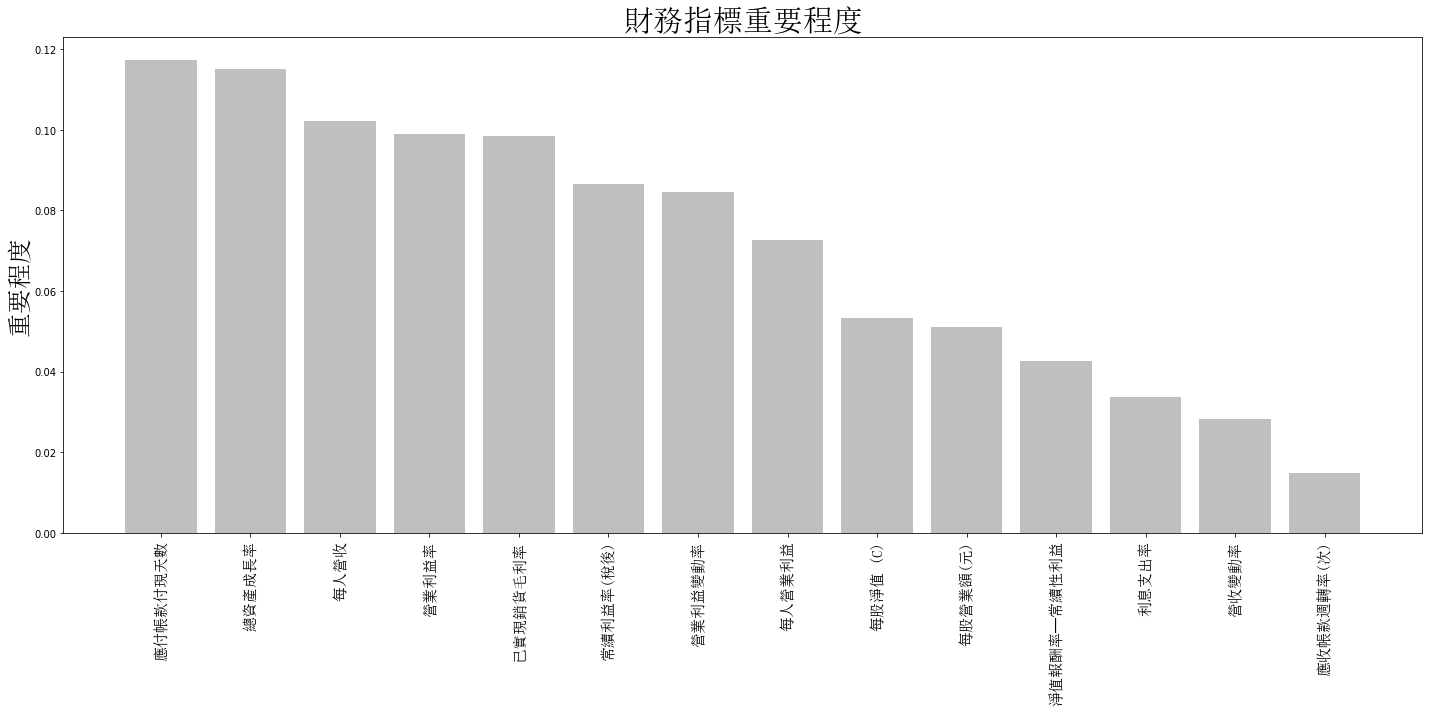

In [42]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=15)

objects = importance[0][importance[1] > 0].values
y_pos = np.arange(len(objects))
performance = importance[1][importance[1] > 0]

plt.figure(figsize = (20, 10))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "grey")
plt.xticks(y_pos, objects, rotation = 90, fontproperties=font)
plt.ylabel(u'重要程度', fontproperties=font, size = 25)
plt.title('財務指標重要程度', fontproperties=font, size = 30)
plt.tight_layout()
plt.show()

In [43]:
predict_data = pd.read_csv("predict_data-set.csv")
predict_data = predict_data[predict_data["TEJ子產業_名稱"] == "連接器"]

company_list = np.array([predict_data["公司"]]).reshape(len(predict_data["公司"]), )
company_code = np.array([predict_data["code"]]).reshape(len(predict_data["code"]), )
company_type = np.array([predict_data["TEJ子產業_名稱"]]).reshape(len(predict_data["code"]), )

predict_data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

#將data轉成array
xx = np.zeros([len(predict_data), 1])
for ix in predict_data.columns:
    xx = np.append(xx, np.array(predict_data["{}".format(ix)]).reshape(len(predict_data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

recommand_list_connection = pd.DataFrame(list(zip(company_list, company_code, company_type, clf.predict(X))))
recommand_list_connection = recommand_list_connection[recommand_list_connection[3] == 2]
recommand_list_connection

,0,1,2,3
0,2328 廣宇,2328,連接器,2.0
1,2392 正崴,2392,連接器,2.0
2,2440 太空梭,2440,連接器,2.0
4,3011 今皓,3011,連接器,2.0
5,3021 鴻名,3021,連接器,2.0
6,3023 信邦,3023,連接器,2.0
9,3501 維熹,3501,連接器,2.0
10,3665 貿聯-KY,3665,連接器,2.0
11,4943 康控-KY,4943,連接器,2.0
12,6115 鎰勝,6115,連接器,2.0


## 零組件代理

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EE5231D0>]], dtype=object)

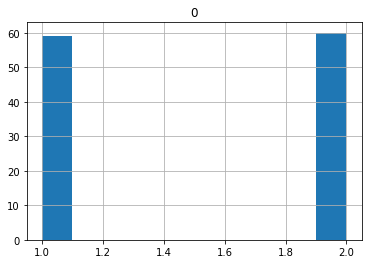

In [44]:
data = pd.read_csv("data_set.csv")

#將財報名稱中的Q剔除

data_columns = np.array([data.columns]).reshape(len(data.columns), )

for i in range(len(data_columns)):
    if (data_columns[i][0] == "Q"):
        data_columns[i] = data_columns[i][1:]
    else:
        data_columns[i] = data_columns[i]

data.columns = data_columns

#選擇產業類別

data = data[data.TEJ子產業_名稱 == '零組件代理']

data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

Return = np.array(data["return"])

for i in range(0, len(Return)):
    if Return[i] < 0.104:
        Return[i] = 1
    else:
        Return[i] =2
##看各群組數量      
pd.DataFrame(Return).hist()

In [45]:
#將return label拿掉
X = data.drop("return", axis = 1)

#將data轉成array
xx = np.zeros([len(data), 1])
for ix in X.columns:
    xx = np.append(xx, np.array(X["{}".format(ix)]).reshape(len(data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

Y = Return

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 666)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini", 
                             n_estimators = 3,  
                             random_state = 48, 
                             max_features = 0.6, #0.2 ,0.6
                             max_depth = 7,      
                             min_samples_leaf = 12) 

clf.fit(x_train, y_train)
z = clf.predict(x_train)

y_predict_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, z)
test_acc = accuracy_score(y_test, y_predict_test)

print("Accuracy_train : %.2f%%" % (train_acc * 100.0),"\n"
      "Accuracy_test  : %.2f%%" % (test_acc * 100.0))

Accuracy_train : 74.70% 
Accuracy_test  : 72.22%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297EE4FAB00>]], dtype=object)

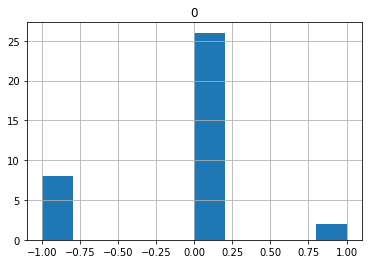

In [47]:
pd.DataFrame((y_predict_test - y_test)).hist()

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict_test)

array([[17,  2],
       [ 8,  9]], dtype=int64)

Normalized confusion matrix
[[ 0.89473684  0.10526316]
 [ 0.47058824  0.52941176]]


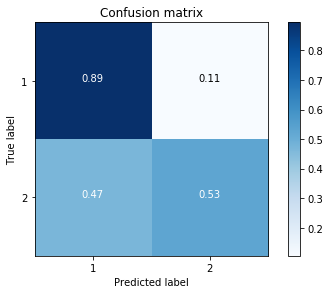

In [49]:
plot_confusion_matrix(confusion_matrix(y_test, y_predict_test), classes = ["1", "2"], normalize = True)

In [50]:
importance = pd.DataFrame(list(zip(data.drop("return", axis = 1).columns, clf.feature_importances_)))
importance.sort_values(by = 1, ascending = False, inplace = True)
importance[importance[1] > 0]

,0,1
15,有息負債利率,0.186843
30,稅前淨利成長率,0.155643
52,存貨週轉率 (次),0.150622
0,資產報酬率 (C),0.146490
63,季底普通股市值,0.101060
28,已實現銷貨毛利成長率,0.091694
57,淨營業週期 (日),0.085997
32,經常淨利成長率,0.081651


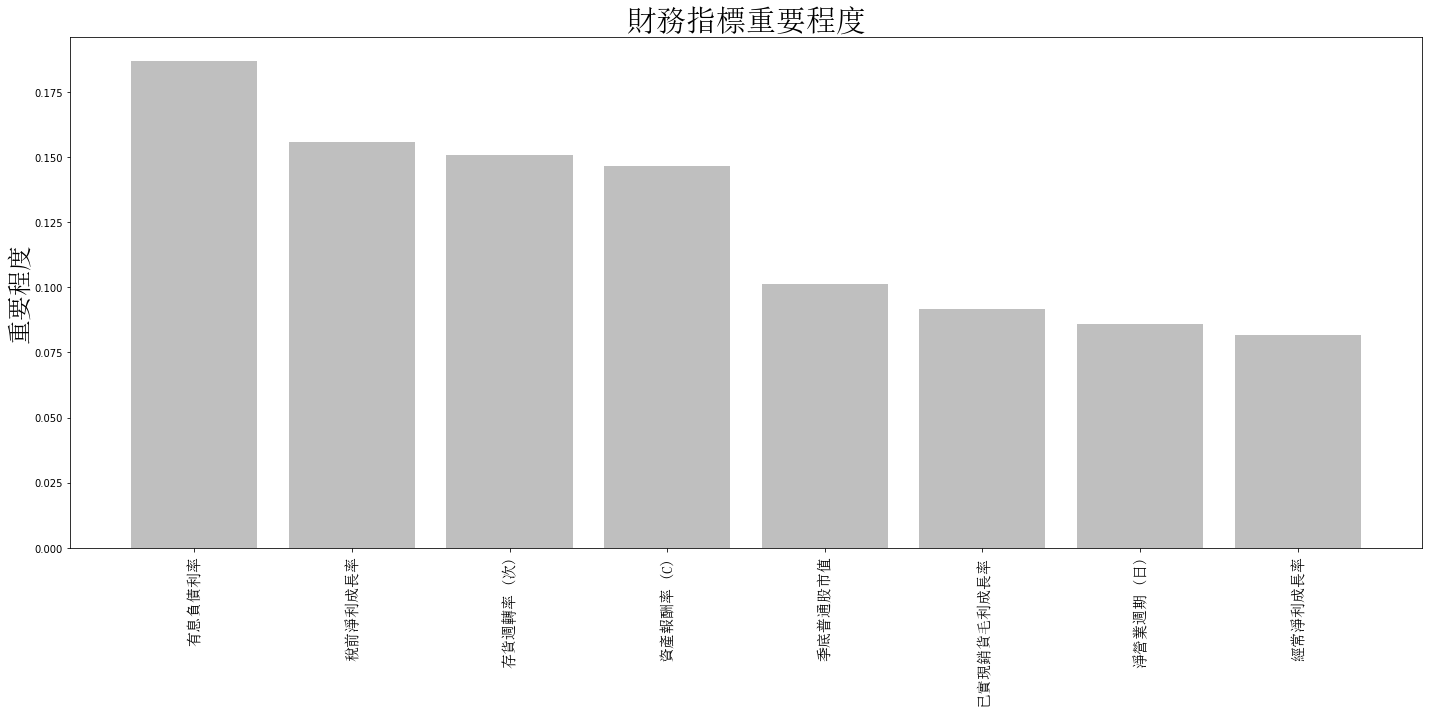

In [51]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=15)

objects = importance[0][importance[1] > 0].values
y_pos = np.arange(len(objects))
performance = importance[1][importance[1] > 0]

plt.figure(figsize = (20, 10))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "grey")
plt.xticks(y_pos, objects, rotation = 90, fontproperties=font)
plt.ylabel(u'重要程度', fontproperties=font, size = 25)
plt.title('財務指標重要程度', fontproperties=font, size = 30)
plt.tight_layout()
plt.show()

In [52]:
predict_data = pd.read_csv("predict_data-set.csv")
predict_data = predict_data[predict_data["TEJ子產業_名稱"] == "零組件代理"]

company_list = np.array([predict_data["公司"]]).reshape(len(predict_data["公司"]), )
company_code = np.array([predict_data["code"]]).reshape(len(predict_data["code"]), )
company_type = np.array([predict_data["TEJ子產業_名稱"]]).reshape(len(predict_data["code"]), )

predict_data.drop(["公司", "TEJ子產業_名稱","date", "code"], axis = 1, inplace = True)

#將data轉成array
xx = np.zeros([len(predict_data), 1])
for ix in predict_data.columns:
    xx = np.append(xx, np.array(predict_data["{}".format(ix)]).reshape(len(predict_data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

recommand_list_proxy = pd.DataFrame(list(zip(company_list, company_code, company_type, clf.predict(X))))
recommand_list_proxy = recommand_list_proxy[recommand_list_proxy[3] == 2]
recommand_list_proxy

,0,1,2,3
0,2359 所羅門,2359,零組件代理,2.0
2,3010 華立,3010,零組件代理,2.0
3,3028 增你強,3028,零組件代理,2.0
4,3033 威健,3033,零組件代理,2.0
8,3209 全科,3209,零組件代理,2.0
9,3312 弘憶股,3312,零組件代理,2.0
10,3528 安馳,3528,零組件代理,2.0
11,3702 大聯大,3702,零組件代理,2.0


## 統整推薦清單

In [53]:
final_recommand_list = pd.concat([recommand_list_ic_desgin, recommand_list_construct, recommand_list_car, recommand_list_connection, recommand_list_proxy])

final_recommand_list.columns = ["公司名稱", "股票代碼", "產業類別", "推薦與否"]
final_recommand_list.drop("推薦與否", axis = 1, inplace = True)
final_recommand_list.head()

,公司名稱,股票代碼,產業類別
1,2379 瑞昱,2379,IC設計
3,2401 凌陽,2401,IC設計
4,2436 偉詮電,2436,IC設計
7,3006 晶豪科,3006,IC設計
9,3035 智原,3035,IC設計


In [54]:
final_recommand_list.to_excel("recommand_list.xls")